In [1]:
import numpy as np
import matplotlib.pyplot as plt


from hnc_SVT import  HNC_solver
from qsps import *


In [2]:
N_bins = 1000

In [9]:
def run_hnc(n_in_per_cc, T, Z, A, Zstar, num_iterations=1e3, c_s_r_guess=None , method='best', alpha=0.01):
    ri = QSP_HNC.rs_from_n(n_in_per_cc*1e6 *aB**3)
    qsp = QSP_HNC(Z, A, Zstar, Te, Ti, ri)

    N_species = 2
    Gamma = np.array(  [[qsp.Γii,  qsp.Γei],
                        [qsp.Γei,  qsp.Γee]])


    names = ["Ion-1", "Electron", ] 
    kappa = 1
    rhos = np.array([  3/(4*np.pi), Zstar*3/(4*np.pi) ])
    temps = np.array([qsp.Te_c, qsp.Ti])
    masses= np.array([m_e, qsp.m_i])
    hnc1 = HNC_solver(N_species, Gamma, rhos, temps, masses , tol=1e-5,
                     kappa_multiscale=1, num_iterations=int(num_iterations), 
                     R_max=5, N_bins=N_bins, names=names, dst_type=3)

    βu_r_matrix = np.array([[qsp.βvii(hnc1.r_array), qsp.βvei(hnc1.r_array)],
                            [qsp.βvei(hnc1.r_array), qsp.βvee(hnc1.r_array)]])

    hnc1.set_βu_matrix(βu_r_matrix)
    hnc1.initialize_c_k()
    if c_s_r_guess is not None:
        for i in range(N_species):
            for j in range(N_species):
                if (c_s_r_guess[i,j]!=np.zeros(hnc1.N_bins)).all():
                    hnc1.c_s_r_matrix[i,j] = c_s_r_guess[i,j]
                    hnc1.c_s_k_matrix[i,j] = hnc1.FT_r_2_k(c_s_r_guess[i,j])
                    hnc1.c_r_matrix[i,j] = hnc1.c_s_k_matrix[i,j] - hnc1.βu_l_k_matrix[i,j]

    hnc1.set_C_matrix()
    hnc1.HNC_solve(alpha_method=method, alpha_Picard = alpha, alpha_oz = 0e-4, h_max=1e4)

    return hnc1, qsp

In [11]:
def run_hnc_one_species(n_in_per_cc, T, Z, A, Zstar, num_iterations=1e3, method='best' , alpha=0.01):
    ri = QSP_HNC.rs_from_n(n_in_per_cc*1e6 *aB**3)
    qsp = QSP_HNC(Z, A, Zstar, Te, Ti, ri)

    N_species = 1
    Gamma = np.array(  [[qsp.Γii]])


    names = ["Ion-1"] 
    kappa = 1
    rho = np.array([  3/(4*np.pi)])
    hnc1 = HNC_solver(N_species, Gamma=Gamma, kappa=kappa, tol=1e-5,
                     kappa_multiscale=1, rho = rho, num_iterations=int(num_iterations), 
                     R_max=5, N_bins=1000, names=names, dst_type=3)

    βu_r_matrix = np.array([[qsp.βvii(hnc1.r_array)]])

    hnc1.set_βu_matrix(βu_r_matrix)
    hnc1.initialize_c_k()
    hnc1.set_C_matrix()
    hnc1.HNC_solve(alpha_method=method, alpha_Picard = alpha, alpha_oz = 0e-4, h_max=1e4)
    return hnc1, qsp

# Priority 1
## Carbon

In [14]:
ni = 5.01e23 # per cc
Te = 2*eV 
Ti   = 2*eV 
Z, A = 6,12
Zstar= 3

# c_s_r_guess = np.zeros((2,2,N_bins))
# c_s_r_guess[0,0] = carbon_one_species.c_s_r_matrix

carbon, carbonqsp = run_hnc(ni, Te, Z, A, Zstar ,method='fixed', alpha=1e-4, num_iterations=2)


Λee = 0.328
Λei = 0.232
Γii=82.957, Γie=-1.499, Γee=0.500 
r_i=1.476
r_e=1.023
θ  =4.18e-02
L:  [[929.46609684 -16.14536833]
 [-16.14536833   4.6936343 ]]
S:  [[929.46609684 -16.14536833]
 [-16.14536833   4.6936343 ]]
Normal Inversion:  [[924.27953933 -16.11169705]
 [-16.11169705   4.10681976]]
L:  [[557.01990953  -9.43047045]
 [ -9.43047045   2.49599813]]
S:  [[557.01990953  -9.43047045]
 [ -9.43047045   2.49599813]]
Normal Inversion:  [[551.84633672  -9.38775367]
 [ -9.38775367   2.08522864]]
L:  [[300.35700234  -4.82205262]
 [ -4.82205262   1.02651772]]
S:  [[300.35700234  -4.82205262]
 [ -4.82205262   1.02651772]]
Normal Inversion:  [[295.20857918  -4.77017572]
 [ -4.77017572   0.83454628]]
L:  [[180.17254302  -2.68993414]
 [ -2.68993414   0.41890192]]
S:  [[180.17254302  -2.68993414]
 [ -2.68993414   0.41890192]]
Normal Inversion:  [[175.06063259  -2.63489608]
 [ -2.63489608   0.36134062]]
L:  [[116.63074844  -1.58718173]
 [ -1.58718173   0.16659052]]
S:  [[116.63074844  -1.587181

L:  [[-1.22126973e-05 -6.95731790e-09]
 [-6.95731790e-09  2.37469456e-09]]
S:  [[-1.22126973e-05 -6.95731790e-09]
 [-6.95731790e-09  2.37469456e-09]]
Normal Inversion:  [[ 3.03731780e-06 -6.99956733e-09]
 [-6.99956733e-09  2.37469634e-09]]
L:  [[-1.23605954e-05 -1.96359211e-09]
 [-1.96359211e-09  7.09497249e-10]]
S:  [[-1.23605954e-05 -1.96359211e-09]
 [-1.96359211e-09  7.09497249e-10]]
Normal Inversion:  [[ 2.73289303e-06 -2.00533359e-09]
 [-2.00533359e-09  7.09498995e-10]]
L:  [[-1.19613425e-05 -6.87995738e-09]
 [-6.87995738e-09  2.34802579e-09]]
S:  [[-1.19613425e-05 -6.87995738e-09]
 [-6.87995738e-09  2.34802579e-09]]
Normal Inversion:  [[ 2.97708555e-06 -6.92119689e-09]
 [-6.92119689e-09  2.34802751e-09]]
L:  [[-1.21098202e-05 -1.91890191e-09]
 [-1.91890191e-09  6.93727338e-10]]
S:  [[-1.21098202e-05 -1.91890191e-09]
 [-1.91890191e-09  6.93727338e-10]]
Normal Inversion:  [[ 2.67499956e-06 -1.95964537e-09]
 [-1.95964537e-09  6.93729037e-10]]
L:  [[-1.17146810e-05 -6.80365154e-09]
 

L:  [[-4.72269597e-04 -9.47975314e-08]
 [-9.47975314e-08  3.37617517e-08]]
S:  [[-4.72269597e-04 -9.47975314e-08]
 [-9.47975314e-08  3.37617517e-08]]
Normal Inversion:  [[ 1.10127277e-04 -9.96821271e-08]
 [-9.96821271e-08  3.37623740e-08]]
L:  [[-4.66038830e-04 -6.37422121e-08]
 [-6.37422121e-08  2.33717746e-08]]
S:  [[-4.66038830e-04 -6.37422121e-08]
 [-6.37422121e-08  2.33717746e-08]]
Normal Inversion:  [[ 1.06656423e-04 -6.85276331e-08]
 [-6.85276331e-08  2.33723820e-08]]
L:  [[-4.69077281e-04 -9.26659972e-08]
 [-9.26659972e-08  3.29951058e-08]]
S:  [[-4.69077281e-04 -9.26659972e-08]
 [-9.26659972e-08  3.29951058e-08]]
Normal Inversion:  [[ 1.09393802e-04 -9.74182792e-08]
 [-9.74182792e-08  3.29956989e-08]]
L:  [[-4.47216694e-04 -6.22046069e-08]
 [-6.22046069e-08  2.27824775e-08]]
S:  [[-4.47216694e-04 -6.22046069e-08]
 [-6.22046069e-08  2.27824775e-08]]
Normal Inversion:  [[ 1.02369873e-04 -6.67806267e-08]
 [-6.67806267e-08  2.27830562e-08]]
L:  [[-4.52107782e-04 -9.06517198e-08]
 

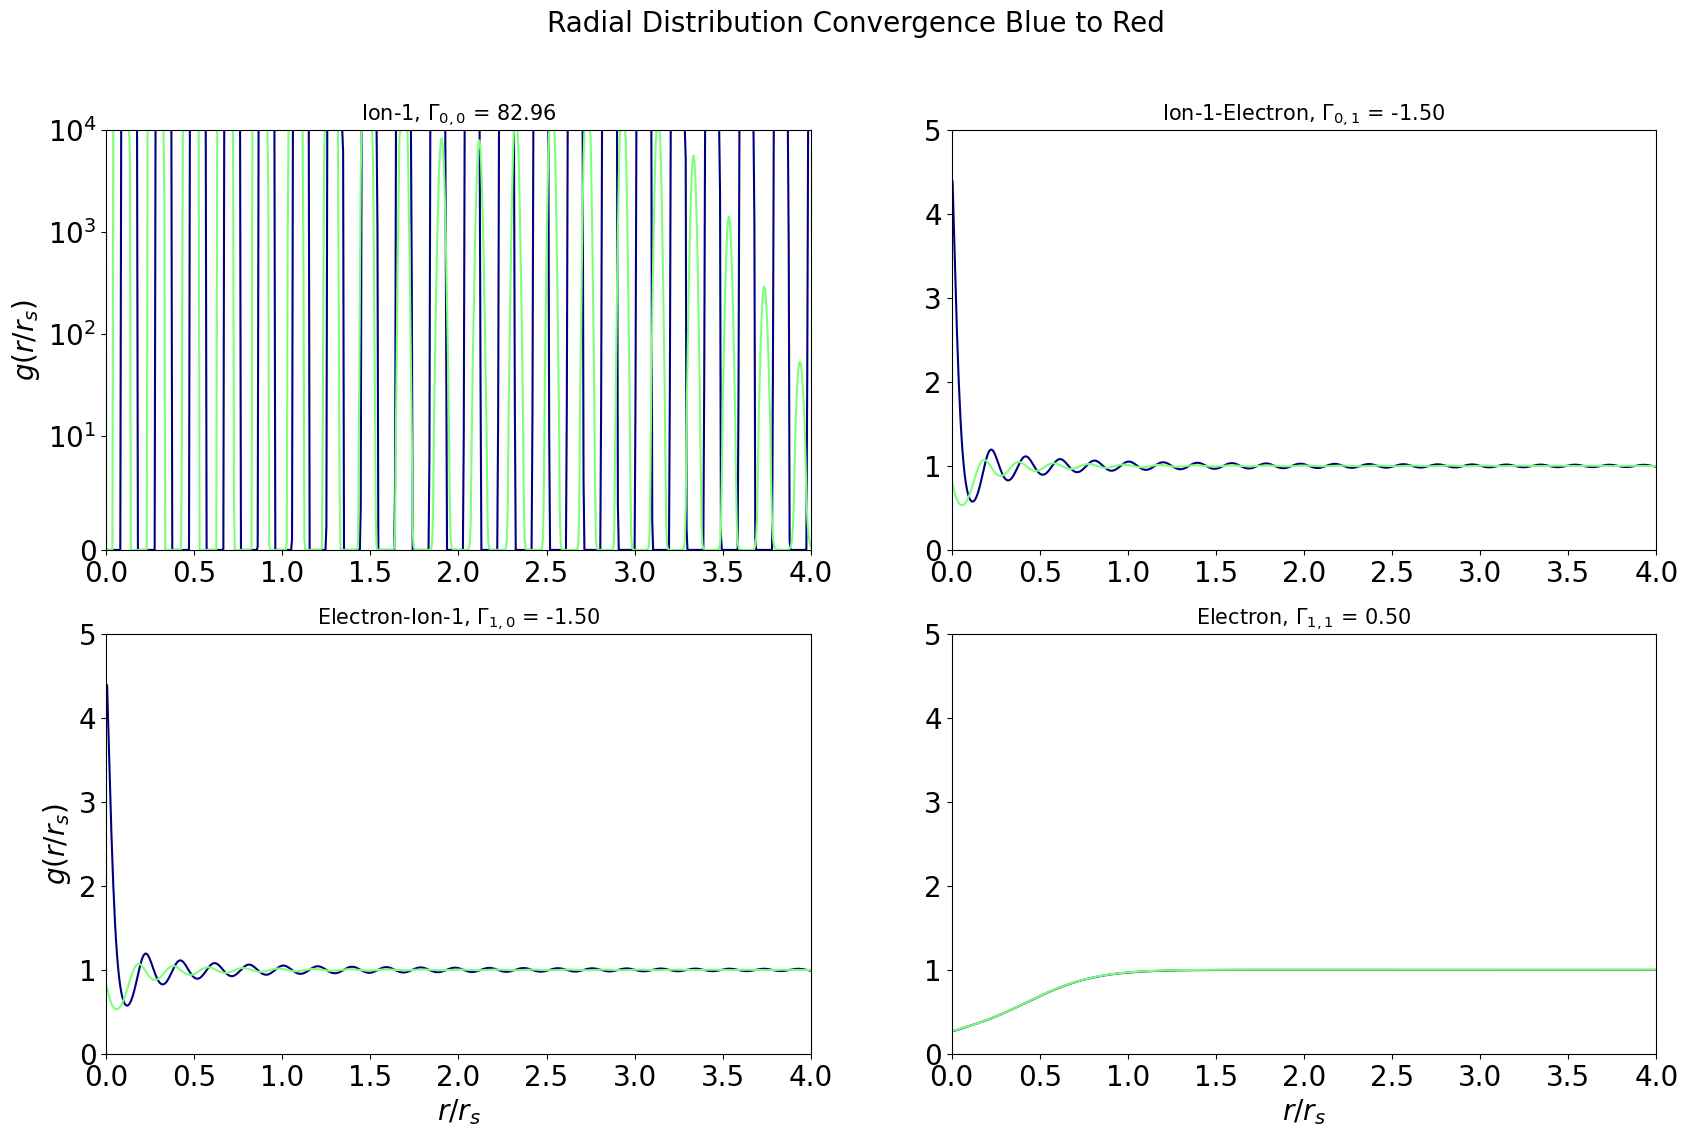

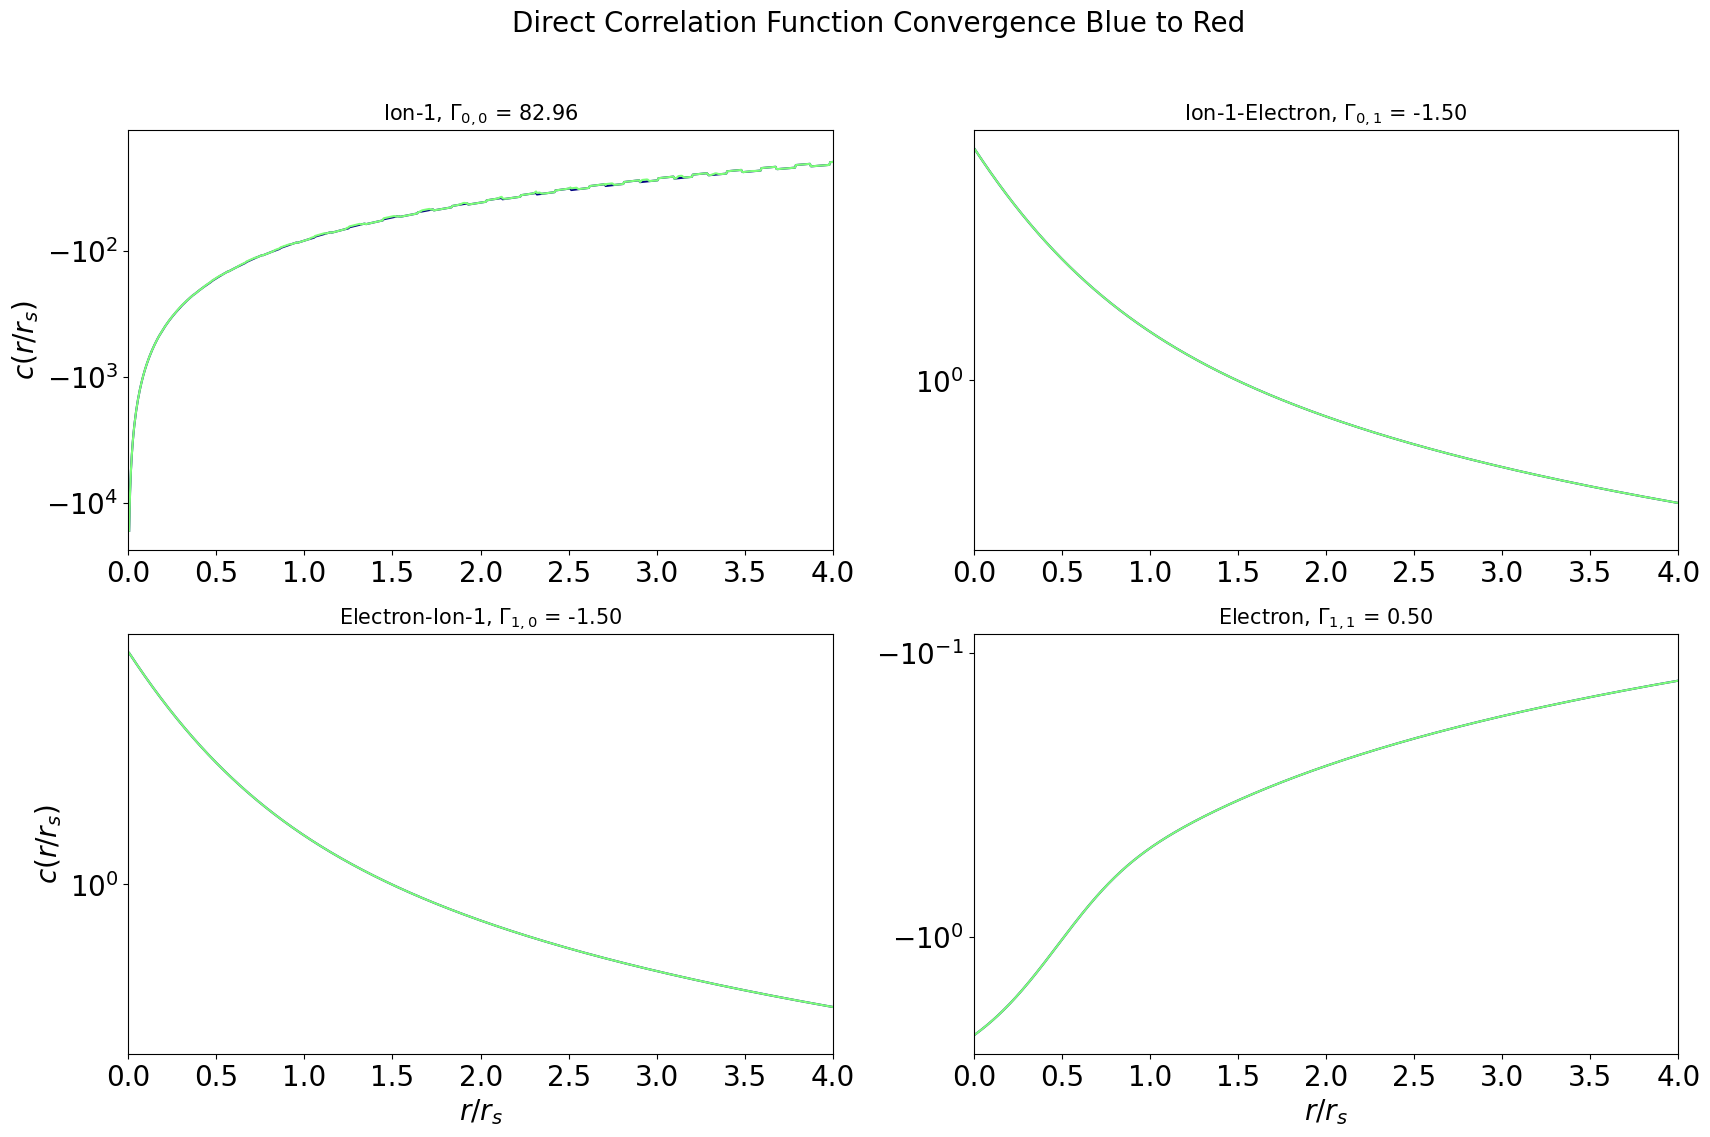

In [15]:
carbon.plot_species_convergence_g(n_slices= int(len(carbon.h_list)/1)  )
carbon.plot_species_convergence_c(n_slices= int(len(carbon.h_list)/1)  )

In [6]:
carbon_one_species, _ = run_hnc_one_species(ni, Te, Z, A, Zstar )

Λee = 1.410
Λei = 0.997
Γii=82.957, Γie=-27.653, Γee=9.217 
r_i=1.476
r_e=1.023
θ  =4.18e-02
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
0: Err in c_r: 2.86e+02, OZ: 2.86e-01, HNC: 1.26e-02
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
1: Err in c_r: 1.57e+02, OZ: 2.68e-01, HNC: 6.61e-03
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
2: Err in c_r: 8.61e+01, OZ: 2.55e-01, HNC: 5.21e-03
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
3: Err in c_r: 4.81e+01, OZ: 2.47e-01, HNC: 1.74e-02
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
4: Err in c_r: 2.77e+01, OZ: 2.42e-01, HNC: 6.07e-02
 HNC min: [0.5] True Optimization terminated successfully

 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
54: Err in c_r: 2.42e-01, OZ: 8.67e-02, HNC: 6.45e-03
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
55: Err in c_r: 2.33e-01, OZ: 8.45e-02, HNC: 6.18e-03
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
56: Err in c_r: 2.24e-01, OZ: 8.25e-02, HNC: 5.92e-03
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
57: Err in c_r: 2.16e-01, OZ: 8.05e-02, HNC: 5.68e-03
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
58: Err in c_r: 2.08e-01, OZ: 7.85e-02, HNC: 5.45e-03
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
59: Err in c_r: 2.01e-01, OZ

103: Err in c_r: 4.82e-02, OZ: 2.36e-02, HNC: 1.16e-03
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
104: Err in c_r: 4.68e-02, OZ: 2.30e-02, HNC: 1.13e-03
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
105: Err in c_r: 4.53e-02, OZ: 2.24e-02, HNC: 1.09e-03
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
106: Err in c_r: 4.40e-02, OZ: 2.18e-02, HNC: 1.06e-03
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
107: Err in c_r: 4.27e-02, OZ: 2.12e-02, HNC: 1.03e-03
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
108: Err in c_r: 4.14e-02, OZ: 2.06e-02, HNC: 9.95e-04
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimi

 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
155: Err in c_r: 1.04e-02, OZ: 5.57e-03, HNC: 2.46e-04
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
156: Err in c_r: 1.01e-02, OZ: 5.41e-03, HNC: 2.39e-04
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
157: Err in c_r: 9.84e-03, OZ: 5.26e-03, HNC: 2.32e-04
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
158: Err in c_r: 9.57e-03, OZ: 5.12e-03, HNC: 2.25e-04
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
159: Err in c_r: 9.30e-03, OZ: 4.98e-03, HNC: 2.19e-04
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
160: Err in c_r: 9.04e-

 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
207: Err in c_r: 2.41e-03, OZ: 1.31e-03, HNC: 5.62e-05
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
208: Err in c_r: 2.34e-03, OZ: 1.27e-03, HNC: 5.46e-05
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
209: Err in c_r: 2.28e-03, OZ: 1.24e-03, HNC: 5.31e-05
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
210: Err in c_r: 2.21e-03, OZ: 1.20e-03, HNC: 5.16e-05
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
211: Err in c_r: 2.15e-03, OZ: 1.17e-03, HNC: 5.02e-05
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
212: Err in c_r: 2.09e-

 OZ min:  [0.] True Optimization terminated successfully.
258: Err in c_r: 5.81e-04, OZ: 3.17e-04, HNC: 1.35e-05
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
259: Err in c_r: 5.65e-04, OZ: 3.08e-04, HNC: 1.31e-05
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
260: Err in c_r: 5.49e-04, OZ: 3.00e-04, HNC: 1.28e-05
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
261: Err in c_r: 5.34e-04, OZ: 2.92e-04, HNC: 1.24e-05
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
262: Err in c_r: 5.20e-04, OZ: 2.84e-04, HNC: 1.21e-05
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
263: Err in c_r: 5.05e-04, OZ: 2.76e-04, HNC: 1.18e-05
 HNC min: [0.5] True Optimi

 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
310: Err in c_r: 1.37e-04, OZ: 7.47e-05, HNC: 3.18e-06
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
311: Err in c_r: 1.33e-04, OZ: 7.27e-05, HNC: 3.09e-06
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
312: Err in c_r: 1.29e-04, OZ: 7.07e-05, HNC: 3.01e-06
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
313: Err in c_r: 1.26e-04, OZ: 6.88e-05, HNC: 2.93e-06
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
314: Err in c_r: 1.22e-04, OZ: 6.69e-05, HNC: 2.85e-06
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
315: Err in c_r: 1.19e-

 OZ min:  [0.] True Optimization terminated successfully.
364: Err in c_r: 3.05e-05, OZ: 1.67e-05, HNC: 7.09e-07
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
365: Err in c_r: 2.97e-05, OZ: 1.62e-05, HNC: 6.90e-07
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
366: Err in c_r: 2.88e-05, OZ: 1.58e-05, HNC: 6.71e-07
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
367: Err in c_r: 2.81e-05, OZ: 1.53e-05, HNC: 6.52e-07
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
368: Err in c_r: 2.73e-05, OZ: 1.49e-05, HNC: 6.34e-07
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
369: Err in c_r: 2.65e-05, OZ: 1.45e-05, HNC: 6.17e-07
 HNC min: [0.5] True Optimi

In [ ]:
carbon.plot_g_vs_murillo()
carbon.plot_g_vs_murillo(gmax=3)

NameError: name 'carbon' is not defined

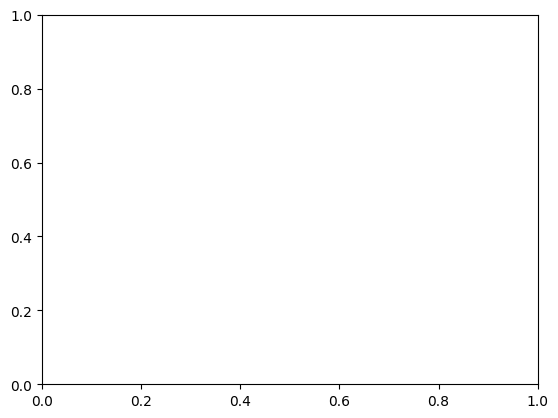

In [7]:
fig, ax = plt.subplots()

ax.plot(carbon.r_array, carbon.h_r_matrix[0,0]+1, label='Ion and Electron')
ax.plot(carbon.r_array, carbon_one_species.h_r_matrix[0,0]+1, label="Ion only")
ax.legend()



In [ ]:
Zstar*np.sum(carbon.del_k*carbon.k_array**2*(carbon.h_r_matrix[0,0]+1))  - Zstar*np.sum(carbon.del_k*carbon.k_array**2*(carbon.h_r_matrix[0,1]+1))

In [ ]:
-1895796.408371091

## Copper

In [41]:
ni = 8.49e22 # per cc
Te = 1*eV 
Ti   = 1*eV 
Z, A = 29,63.55
Zstar= 1.206
c_s_r_guess = np.zeros((2,2,N_bins))
c_s_r_guess[0,0] = carbon_one_species.c_s_r_matrix


copper,_ = run_hnc(ni, Te, Z, A, Zstar ,num_iterations=10, method='fixed', c_s_r_guess=c_s_r_guess)

Λee = 1.103
Λei = 0.780
Γii=14.837, Γie=-12.303, Γee=10.201 
r_i=2.667
r_e=2.506
θ  =1.25e-01
0: Err in c_r: 2.26e+00, OZ: 3.53e+03, HNC: inf
1: Err in c_r: 5.87e-02, OZ: 1.19e+02, HNC: inf
2: Err in c_r: 1.08e-01, OZ: 1.74e+02, HNC: inf
3: Err in c_r: 2.08e+00, OZ: 2.49e+03, HNC: inf
4: Err in c_r: 2.99e+00, OZ: 2.24e+04, HNC: inf
5: Err in c_r: 1.12e+00, OZ: 7.79e+02, HNC: inf
6: Err in c_r: 8.21e-01, OZ: 3.70e+02, HNC: inf
7: Err in c_r: 9.67e-01, OZ: 7.45e+02, HNC: inf
8: Err in c_r: 3.00e+00, OZ: 2.02e+04, HNC: inf
9: Err in c_r: 1.89e+00, OZ: 4.51e+03, HNC: inf


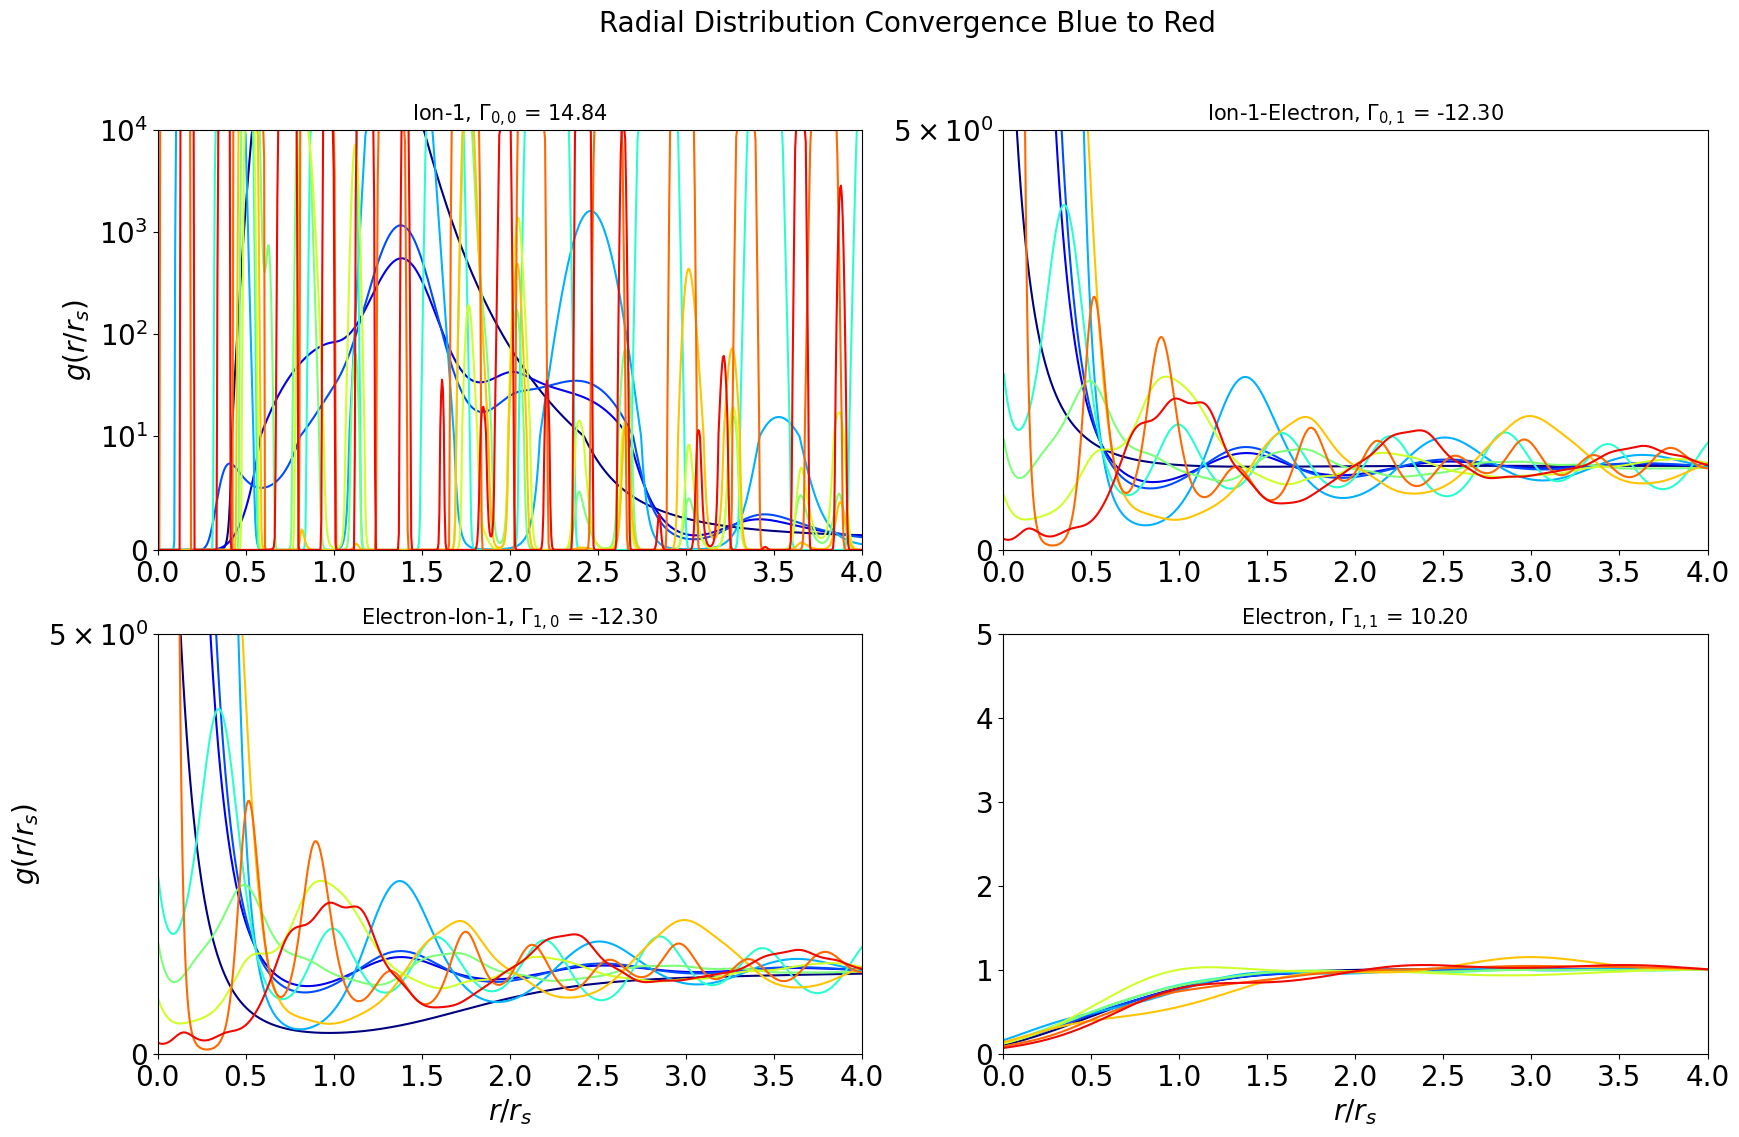

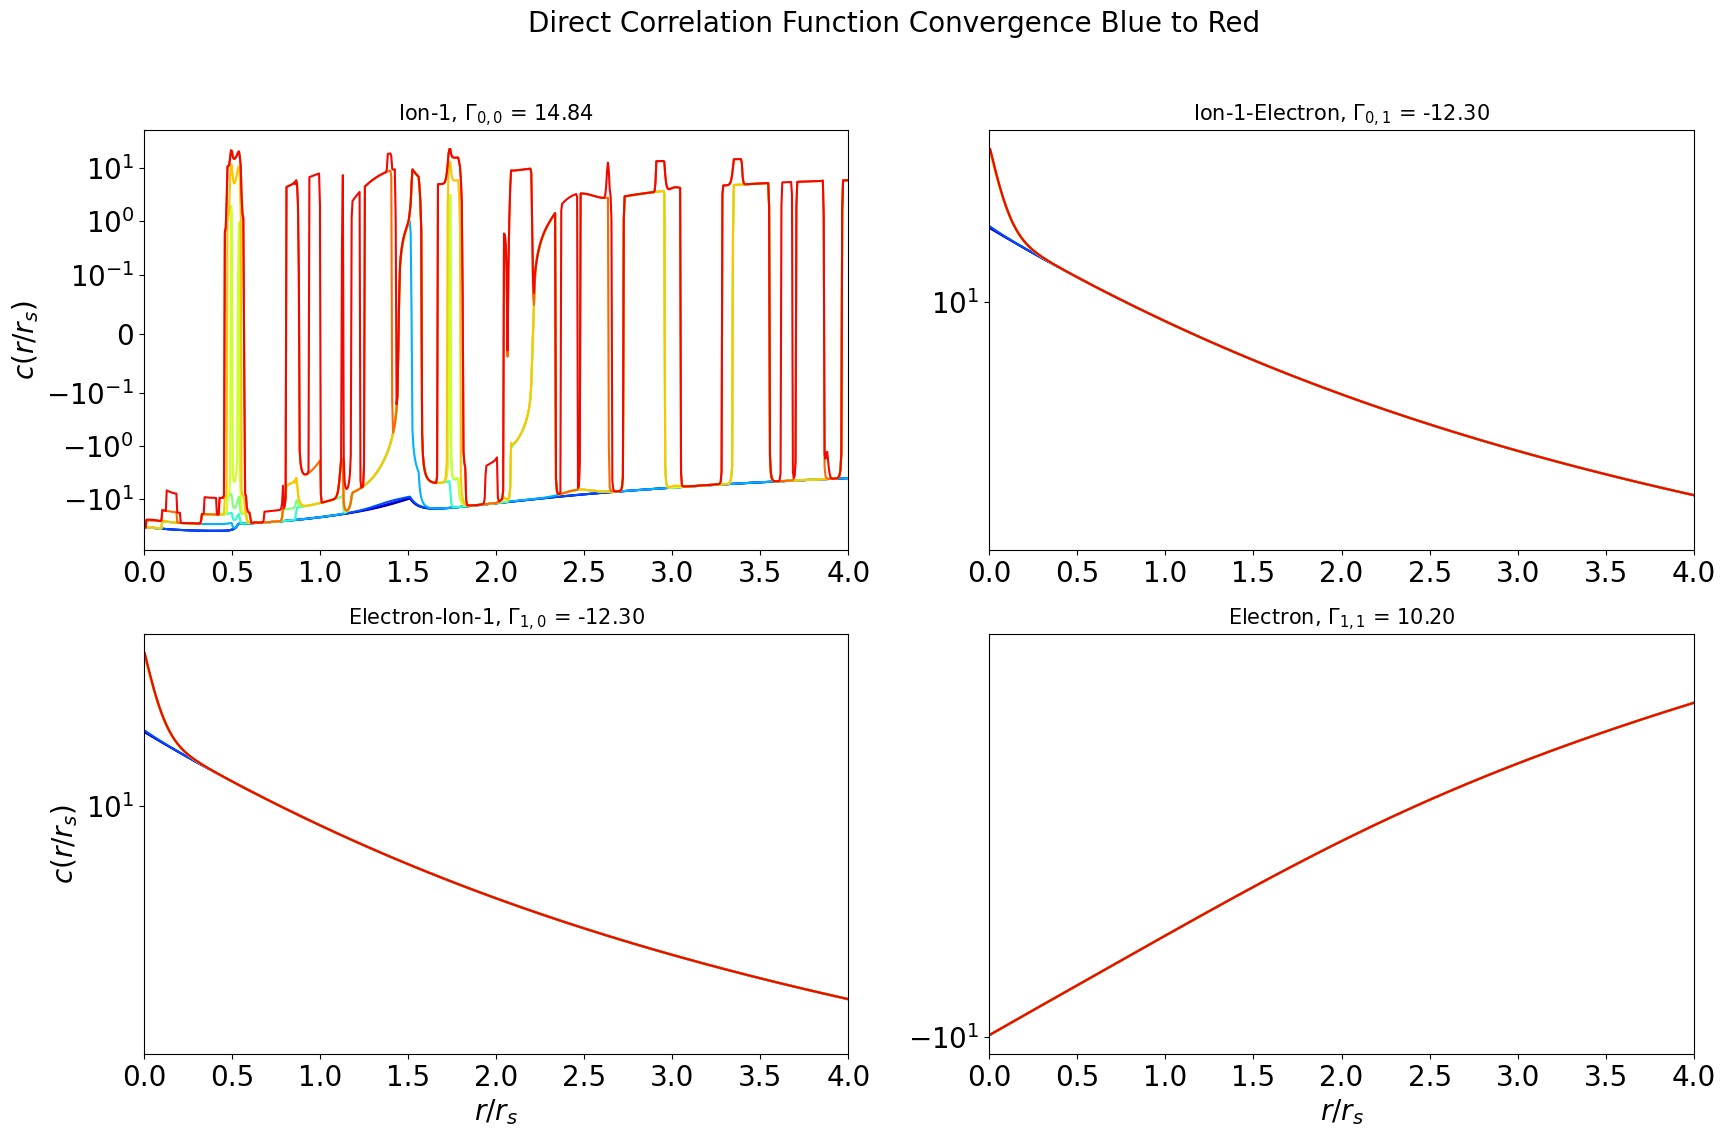

In [42]:
copper.plot_species_convergence_g(n_slices= int(len(copper.h_list)/1)  )
copper.plot_species_convergence_c(n_slices= int(len(copper.h_list)/1)  )

In [39]:
copper_one_species,_ = run_hnc_one_species(ni, Te, Z, A, Zstar )

Λee = 1.103
Λei = 0.780
Γii=14.837, Γie=-12.303, Γee=10.201 
r_i=2.667
r_e=2.506
θ  =1.25e-01
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.00313886] True Optimization terminated successfully.
0: Err in c_r: 5.56e+01, OZ: 1.54e-01, HNC: 1.60e-02
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
1: Err in c_r: 2.90e+01, OZ: 1.45e-01, HNC: 1.15e-02
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
2: Err in c_r: 1.52e+01, OZ: 1.34e-01, HNC: 9.94e-03
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
3: Err in c_r: 8.05e+00, OZ: 1.25e-01, HNC: 9.62e-03
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
4: Err in c_r: 4.34e+00, OZ: 1.17e-01, HNC: 9.65e-03
 HNC min: [0.5] True Optimization terminated suc

 OZ min:  [0.] True Optimization terminated successfully.
52: Err in c_r: 2.06e-03, OZ: 9.59e-04, HNC: 9.72e-05
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
53: Err in c_r: 1.85e-03, OZ: 8.61e-04, HNC: 8.72e-05
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
54: Err in c_r: 1.66e-03, OZ: 7.72e-04, HNC: 7.82e-05
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
55: Err in c_r: 1.49e-03, OZ: 6.93e-04, HNC: 7.02e-05
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
56: Err in c_r: 1.34e-03, OZ: 6.22e-04, HNC: 6.29e-05
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
57: Err in c_r: 1.20e-03, OZ: 5.58e-04, HNC: 5.65e-05
 HNC min: [0.5] True Optimization

 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
101: Err in c_r: 1.00e-05, OZ: 4.69e-06, HNC: 4.75e-07
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
102: Err in c_r: 9.00e-06, OZ: 4.21e-06, HNC: 4.26e-07


In [ ]:
fig, ax = plt.subplots()

ax.plot(copper.r_array, copper.h_r_matrix[0,0]+1, label='Ion and electron')
ax.plot(copper.r_array, copper_one_species.h_r_matrix[0,0]+1, label="Only Ions")
ax.legend()



## Hydrogen

In [18]:
ni = 5.98e23 # per cc
Te = 2*eV 
Ti   = 2*eV 
Z, A = 1,1
Zstar= 1
hydrogen, _ = run_hnc(ni, Te, Z, A, Zstar )

Λee = 1.496
Λei = 1.058
Γii=9.778, Γie=-9.783, Γee=9.778 
r_i=1.391
r_e=1.391
θ  =7.73e-02
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
0: Err in c_r: 1.85e+01, OZ: 6.94e-02, HNC: 1.49e-01
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
1: Err in c_r: 9.61e+00, OZ: 6.11e-02, HNC: 7.87e-02
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
2: Err in c_r: 5.00e+00, OZ: 5.44e-02, HNC: 6.94e-02
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
3: Err in c_r: 2.62e+00, OZ: 4.87e-02, HNC: 7.50e-02
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
4: Err in c_r: 1.39e+00, OZ: 4.37e-02, HNC: 8.40e-02
 HNC min: [0.5] True Optimization terminated successfully.


 OZ min:  [0.] True Optimization terminated successfully.
50: Err in c_r: 1.01e-04, OZ: 3.28e-03, HNC: 5.28e-03
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
51: Err in c_r: 8.60e-05, OZ: 3.28e-03, HNC: 5.28e-03
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
52: Err in c_r: 7.32e-05, OZ: 3.28e-03, HNC: 5.28e-03
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
53: Err in c_r: 6.23e-05, OZ: 3.28e-03, HNC: 5.28e-03
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
54: Err in c_r: 5.30e-05, OZ: 3.28e-03, HNC: 5.28e-03
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
55: Err in c_r: 4.51e-05, OZ: 3.28e-03, HNC: 5.28e-03
 HNC min: [0.5] True Optimization

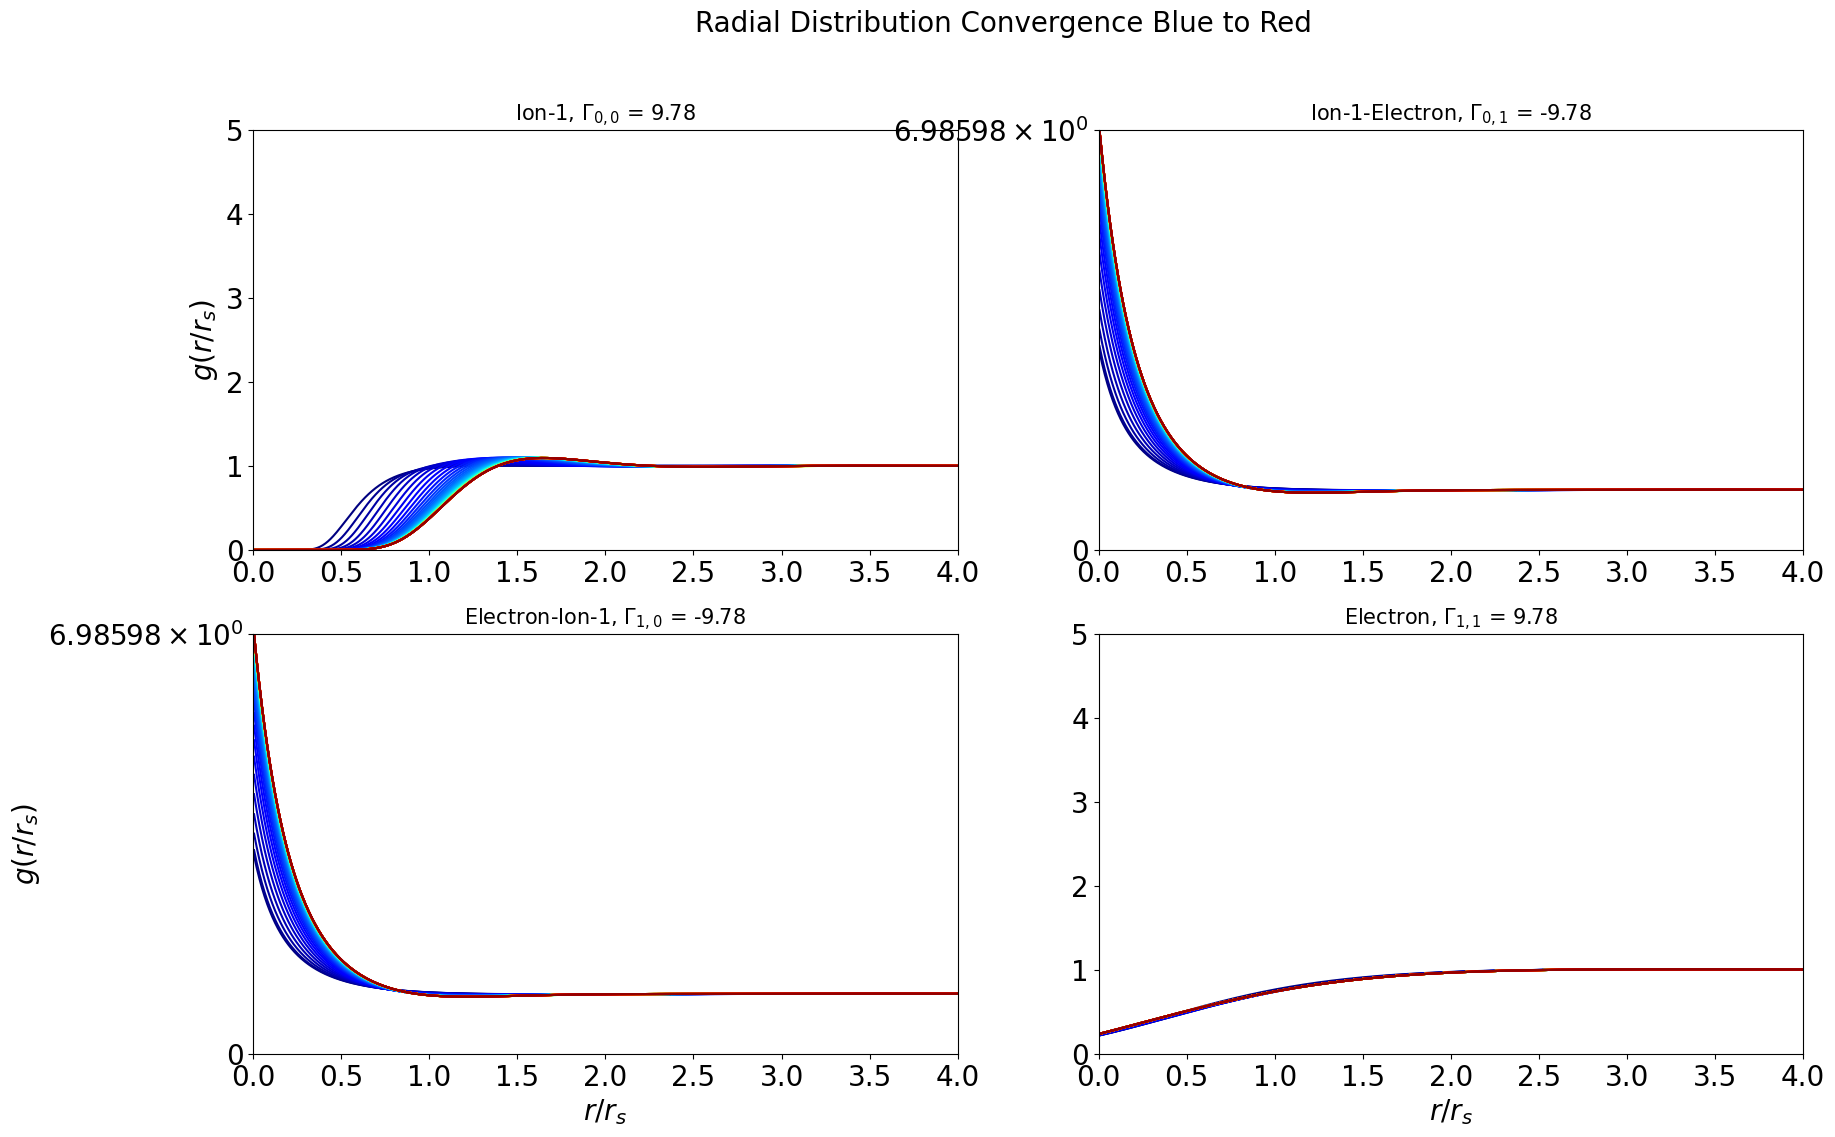

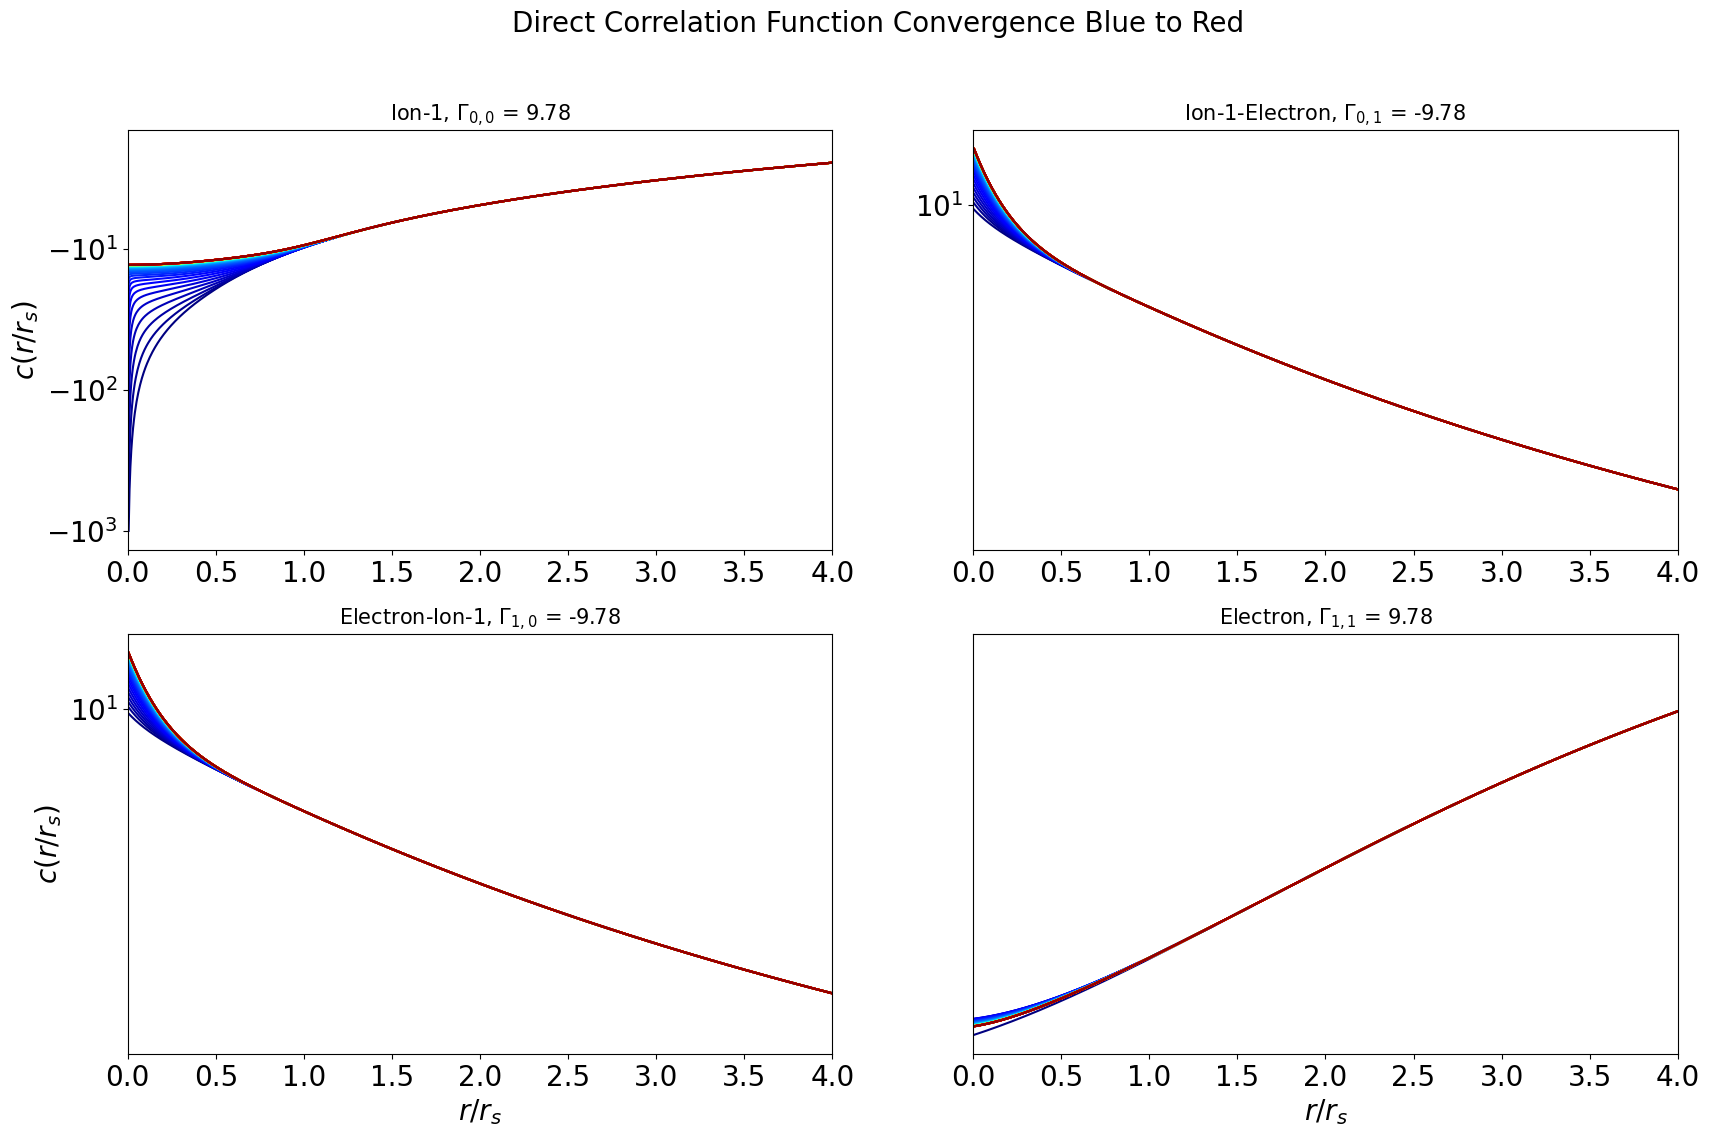

In [19]:
hydrogen.plot_species_convergence_g(n_slices= int(len(hydrogen.h_list)/1)  )
hydrogen.plot_species_convergence_c(n_slices= int(len(hydrogen.h_list)/1)  )

In [22]:
hydrogen_one_species,_ = run_hnc_one_species(ni, Te, Z, A, Zstar )

Λee = 1.496
Λei = 1.058
Γii=9.778, Γie=-9.783, Γee=9.778 
r_i=1.391
r_e=1.391
θ  =7.73e-02
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.00622788] True Optimization terminated successfully.
0: Err in c_r: 3.72e+01, OZ: 1.24e-01, HNC: 1.69e-02
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.00150465] True Optimization terminated successfully.
1: Err in c_r: 1.91e+01, OZ: 1.14e-01, HNC: 1.22e-02
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
2: Err in c_r: 9.93e+00, OZ: 1.05e-01, HNC: 1.04e-02
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.00211755] True Optimization terminated successfully.
3: Err in c_r: 5.22e+00, OZ: 9.06e-02, HNC: 9.42e-03
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.00179066] True Optimization terminated successfully.
4: Err in c_r: 2.77e+00, OZ: 8.08e-02, HNC: 9.05e-03
 HNC min: [0.5] True Optimi

 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
53: Err in c_r: 2.30e-04, OZ: 1.02e-04, HNC: 1.37e-05
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
54: Err in c_r: 1.99e-04, OZ: 8.80e-05, HNC: 1.18e-05
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
55: Err in c_r: 1.72e-04, OZ: 7.62e-05, HNC: 1.02e-05
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
56: Err in c_r: 1.49e-04, OZ: 6.60e-05, HNC: 8.87e-06
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
57: Err in c_r: 1.29e-04, OZ: 5.72e-05, HNC: 7.68e-06
 HNC min: [0.5] True Optimization terminated successfully.
 OZ min:  [0.] True Optimization terminated successfully.
58: Err in c_r: 1.12e-04, OZ

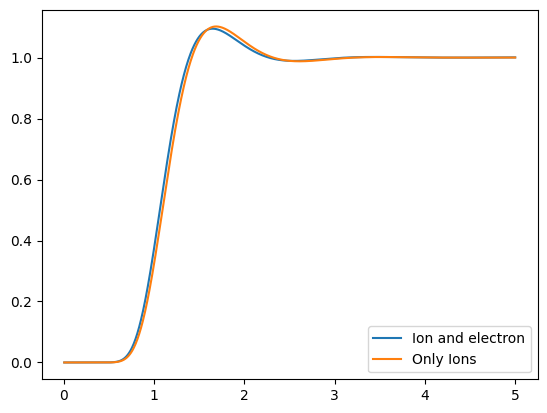

In [24]:
fig, ax = plt.subplots()

ax.plot(hydrogen.r_array, hydrogen.h_r_matrix[0,0]+1, label='Ion and electron')
ax.plot(hydrogen.r_array, hydrogen_one_species.h_r_matrix[0,0]+1, label="Only Ions")
ax.legend()



## Aluminum

In [ ]:
ni = 6.03e22 # per cc
Te = 1*eV 
Ti   = 1*eV 
Z, A = 13,27
Zstar= 3
aluminum_i_one_species = run_hnc_one_species(ni, Te, Z, A, Zstar, num_iterations=1e3 )
aluminum_e_one_species = run_hnc_one_species(Zstar*ni, Te, 1, m_e/m_p, 1, num_iterations=1e3 )


In [ ]:
aluminum_i_one_species.plot_species_convergence_g(n_slices= int(len(aluminum.h_list)/1)  )
aluminum_i_one_species.plot_species_convergence_c(n_slices= int(len(aluminum.h_list)/1)  )

aluminum_e_one_species.plot_species_convergence_g(n_slices= int(len(aluminum.h_list)/1)  )
aluminum_e_one_species.plot_species_convergence_c(n_slices= int(len(aluminum.h_list)/1)  )

In [ ]:
c_s_r_guess = np.zeros((2,2,N_bins))
c_s_r_guess[0,0] = aluminum_i_one_species.c_s_r_matrix
c_s_r_guess[1,1] = aluminum_e_one_species.c_s_r_matrix

In [ ]:
aluminum = run_hnc(ni, Te, Z, A, Zstar, num_iterations=2, c_s_r_guess=c_s_r_guess )

In [ ]:
aluminum.plot_species_convergence_g(n_slices= int(len(aluminum.h_list)/1)  )
aluminum.plot_species_convergence_c(n_slices= int(len(aluminum.h_list)/1)  )

In [ ]:
aluminum.c_list[-1][1,1]/aluminum.c_list[0][1,1]